In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [49]:
#Convert data to csv

In [50]:
# f = open("adult.data", "r")
# data_list = []
# for item in f:
#     tmp_list = []
#     for item1 in item.split(","):
#         tmp_list.append(item1)
#     data_list.append(tmp_list)

# headers = ['age', 'work class', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
#                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# with open('adult.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(headers)
#     for row in data_list:
#         writer.writerow([item.strip() for item in row])

In [51]:
df = pd.read_csv("adult.csv")
df_cleaned = df.iloc[:-1]
df.head()

# Now re-assign the values to x and y without the last row
X = np.array(df_cleaned.iloc[:, :-1].values)
y = np.array(df_cleaned.iloc[:, -1].values)
df.head()

,age,work class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [52]:
print(X)

[[39.0 'State-gov' 77516.0 ... 0.0 40.0 'United-States']
 [50.0 'Self-emp-not-inc' 83311.0 ... 0.0 13.0 'United-States']
 [38.0 'Private' 215646.0 ... 0.0 40.0 'United-States']
 ...
 [58.0 'Private' 151910.0 ... 0.0 40.0 'United-States']
 [22.0 'Private' 201490.0 ... 0.0 20.0 'United-States']
 [52.0 'Self-emp-inc' 287927.0 ... 0.0 40.0 'United-States']]


In [53]:
print(y)

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2004)

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

In [56]:
from sklearn.preprocessing import StandardScaler
# Các chỉ số cột cần scale
indices = [0, 2, 4, 10, 11, 12]

# Tạo một instance của StandardScaler
scaler = StandardScaler()

# Lấy các cột cần scale từ X_train và X_test
X_train_selected = X_train[:, indices]
X_test_selected = X_test[:, indices]

# Áp dụng fit_transform cho X_train và transform cho X_test
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Gán lại các cột đã được scale vào X_train và X_test
X_train[:, indices] = X_train_scaled
X_test[:, indices] = X_test_scaled

In [57]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [58]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='gini', random_state=2004)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print(f'Accuracy on test set: {DTC.score(X_test, y_test)}')

Accuracy on test set: 0.8174420389989252


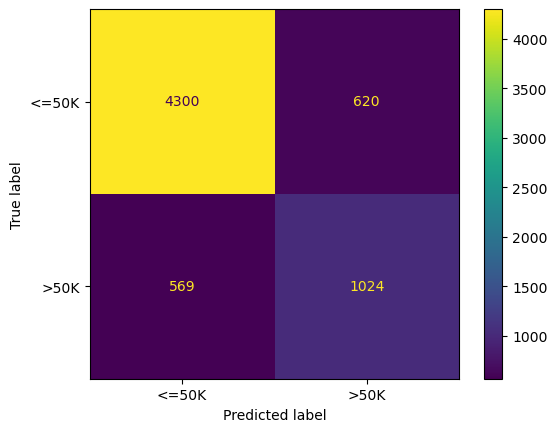

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTC.classes_)
disp.plot()
plt.gca().grid(False)